# Inital exploratory data analysis of car counts dataset

In [1]:
# Import the `pandas` library as `pd`
import pandas as pd
# Import the `numpy` library as `np`
import numpy as np
# pylab for matplotlib
%pylab inline
# load time series modules
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load in the data with `read_csv()`
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv("data.csv", parse_dates=['date'], index_col='date', date_parser=dateparse)
# setting up cloud & day columns as a categorical variable
df['cloud.indicator'] = df['cloud.indicator'].astype('category')
df['day.of.week'] = df['day.of.week'].astype('category')
df

,day.of.week,car.count,weather,cloud.indicator
date,,,,
2010-01-01,Friday,101,0.1,clear
2010-01-02,Saturday,34,0.2,cloudy
2010-01-03,Sunday,113,0.4,clear
2010-01-04,Monday,5,0.6,cloudy
2010-01-05,Tuesday,124,0.1,clear
2010-01-06,Wednesday,104,-0.1,clear
2010-01-07,Thursday,81,-1.0,clear
2010-01-08,Friday,67,-0.3,cloudy
2010-01-09,Saturday,89,0.2,cloudy


In [3]:
# Setting up time series for car counts and weather
ts_car = Series(df['car.count'], index = df.index)
ts_weather = Series(df['weather'], index = df.index)

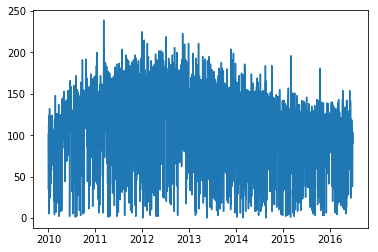

In [4]:
# Plotting time series for car counts
plt.plot(ts_car)

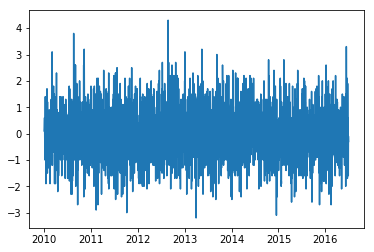

In [5]:
# plotting time series for weather
plt.plot(ts_weather)

In [4]:
# aggregating time series by median or mean over each month
tsm_car_med = ts_car.resample('ohlc')
tsm_car_med

ValueError: Invalid frequency: ohlc

In [13]:
tsm_car_mean = ts_car.resample('Q').median()
tsm_car_mean

date
2010-03-31     96.5
2010-06-30    115.0
2010-09-30    126.0
2010-12-31    137.0
2011-03-31    141.5
2011-06-30    149.0
2011-09-30    147.0
2011-12-31    156.0
2012-03-31    153.0
2012-06-30    159.0
2012-09-30    159.5
2012-12-31    160.0
2013-03-31    147.5
2013-06-30    147.0
2013-09-30    142.5
2013-12-31    132.5
2014-03-31    135.5
2014-06-30    124.0
2014-09-30    129.5
2014-12-31    117.0
2015-03-31    108.0
2015-06-30    110.0
2015-09-30    101.5
2015-12-31    102.5
2016-03-31    105.0
2016-06-30    103.0
Freq: Q-DEC, Name: car.count, dtype: float64

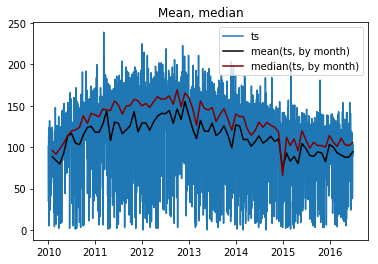

In [18]:
tsm_car_mean = ts_car.resample('M').mean()
ts = plt.plot(ts_car, label ='ts')
ts_mean = plt.plot(tsm_car_mean, 'black', label = 'mean(ts, by month)')
ts_car_med = plt.plot(tsm_car_med, 'maroon', label = 'median(ts, by month)')
plt.legend(loc='best')
plt.title('Mean, median')
plt.show(block=False)

In [14]:
# separating time series by weekend and weekday
df_weekday = df[df.index.weekday <= 4] # Monday - Friday
df_weekend = df[df.index.weekday >= 5] # Saturday - Sunday

# visualizing the first 5 days of the time series
df_weekday.head(5), df_weekend.head(5)

(           day.of.week  car.count  weather cloud.indicator
 date                                                      
 2010-01-01      Friday        101      0.1           clear
 2010-01-04      Monday          5      0.6          cloudy
 2010-01-05     Tuesday        124      0.1           clear
 2010-01-06   Wednesday        104     -0.1           clear
 2010-01-07    Thursday         81     -1.0           clear,
            day.of.week  car.count  weather cloud.indicator
 date                                                      
 2010-01-02    Saturday         34      0.2          cloudy
 2010-01-03      Sunday        113      0.4           clear
 2010-01-09    Saturday         89      0.2          cloudy
 2010-01-10      Sunday        132      1.4           clear
 2010-01-16    Saturday         31     -0.6          cloudy)

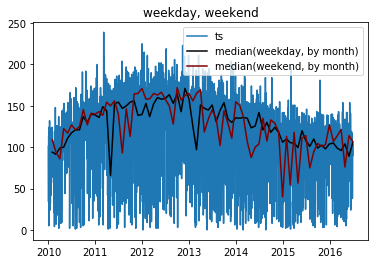

In [15]:
# aggregating weekday, weekend time series by median over each month
tsm_car_weekday = df_weekday['car.count'].resample('M').median()
tsm_car_weekend = df_weekend['car.count'].resample('M').median()
ts = plt.plot(ts_car, label ='ts')
ts_weekday = plt.plot(tsm_car_weekday, 'black', label = 'median(weekday, by month)')
ts_weekend = plt.plot(tsm_car_weekend, 'maroon', label = 'median(weekend, by month)')
plt.legend(loc='best')
plt.title('weekday, weekend')
plt.show(block=False)

In [16]:
# aggregating time series by cloudy / clear days
df_cloudy = df[df['cloud.indicator'][:] == 'cloudy'] # cloudy days
df_clear = df[df['cloud.indicator'][:] == 'clear'] # clear days

# visualizing the first 5 cloudy / clear days of the time series
df_cloudy.head(20), df_clear.head(20)

(           day.of.week  car.count  weather cloud.indicator
 date                                                      
 2010-01-02    Saturday         34      0.2          cloudy
 2010-01-04      Monday          5      0.6          cloudy
 2010-01-08      Friday         67     -0.3          cloudy
 2010-01-09    Saturday         89      0.2          cloudy
 2010-01-14    Thursday         24      0.6          cloudy
 2010-01-16    Saturday         31     -0.6          cloudy
 2010-01-17      Sunday         69      0.0          cloudy
 2010-01-21    Thursday         42      0.2          cloudy
 2010-01-28    Thursday         70      0.0          cloudy
 2010-02-01      Monday         64      0.7          cloudy
 2010-02-04    Thursday        101     -1.3          cloudy
 2010-02-05      Friday         70     -0.4          cloudy
 2010-02-07      Sunday         89     -0.3          cloudy
 2010-02-09     Tuesday         89      0.4          cloudy
 2010-02-10   Wednesday         57      

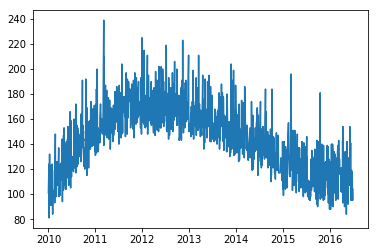

In [17]:
plot(df_clear['car.count'])

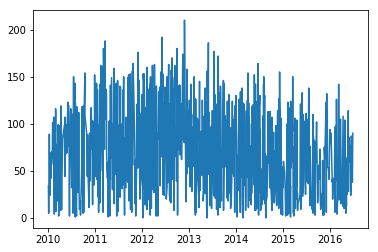

In [18]:
plot(df_cloudy['car.count'])

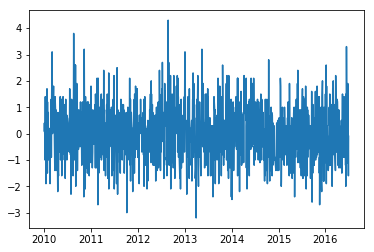

In [12]:
plot(df_clear['weather'])

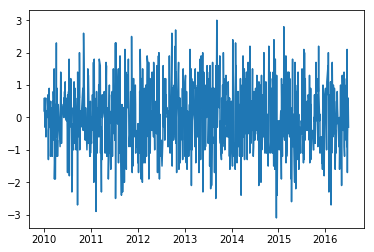

In [13]:
plot(df_cloudy['weather'])

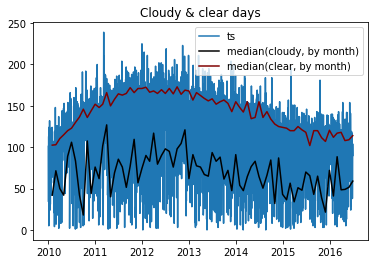

In [14]:
# aggregating cloudy and clear days by median over each month
tsm_car_cloudy = df_cloudy['car.count'].resample('M').median()
tsm_car_clear = df_clear['car.count'].resample('M').median()
ts = plt.plot(ts_car, label ='ts')
ts_cloudy = plt.plot(tsm_car_cloudy, 'black', label = 'median(cloudy, by month)')
ts_clear = plt.plot(tsm_car_clear, 'maroon', label = 'median(clear, by month)')
plt.legend(loc='best')
plt.title('Cloudy & clear days')
plt.show(block=False)

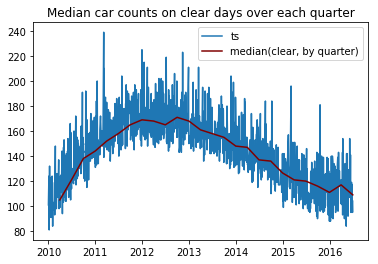

In [15]:
# median car counts over a quarter on clear days
tsy_car_clear = df_clear['car.count'].resample('Q').median()
ts = plt.plot(df_clear['car.count'], label ='ts')
ts_clear = plt.plot(tsy_car_clear, 'maroon', label = 'median(clear, by quarter)')
plt.legend(loc='best')
plt.title('Median car counts on clear days over each quarter')
plt.show(block=False)

In [16]:
# correlation between car counts and weather time series on clear days
df_clear.corr()

,car.count,weather
car.count,1.00000,0.03567
weather,0.03567,1.00000
